April H Marbun - 1103202039

In [ ]:
# Mengimpor semua library yang diperlukan untuk program
import torch  # Library utama PyTorch
import torch.nn as nn  # Modul Neural Network PyTorch
import torch.optim as optim  # Modul optimisasi PyTorch
import torchvision  # Library untuk tugas vision di PyTorch
import torchvision.transforms as transforms  # Modul untuk melakukan transformasi pada data gambar
from torch.utils.data import DataLoader  # Kelas DataLoader untuk memuat data secara efisien

In [ ]:
# Mengecek ketersediaan GPU, dan jika ada, mengatur perangkat ke "cuda", jika tidak, ke "cpu"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Mendefinisikan kelas model VGGNet untuk dataset MNIST
class VGGNetMNIST(nn.Module):
    def __init__(self):
        super(VGGNetMNIST, self).__init__()
        # Definisi layer-layers pada bagian fitur (features) dari model
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        # Definisi layer-layers pada bagian klasifikasi (classifier) dari model
        self.classifier = nn.Sequential(
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10)  # 10 classes for MNIST
        )

    def forward(self, x):
        x = self.features(x)  # Melakukan propagasi maju (forward pass) melalui bagian fitur
        x = x.view(x.size(0), -1)  # Meratakan output untuk persiapan bagiannya pada klasifikasi
        x = self.classifier(x)  # Melakukan propagasi maju melalui bagian klasifikasi
        return x

In [ ]:
#meload MNIST dari dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [ ]:
# Menginisialisasi transformasi data untuk dataset MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
])

# Memuat dataset pelatihan dan pengujian MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Membuat DataLoader untuk dataset pelatihan dan pengujian
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 280797439.23it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 5977286.78it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 194130284.82it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 19223540.63it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Inisialisasi objek model VGGNet untuk MNIST dan memindahkannya ke perangkat yang telah ditentukan (GPU atau CPU)
model = VGGNetMNIST().to(device)

# Menggunakan CrossEntropyLoss sebagai fungsi loss
criterion = nn.CrossEntropyLoss()

# Menginisialisasi optimizer Adam dengan laju pembelajaran 0.001 dan mengoptimalkan parameter dari model
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Loop pelatihan untuk sejumlah epoch yang telah ditentukan (5 dalam hal ini)
num_epochs = 5
for epoch in range(num_epochs):
    # Mengatur model ke mode pelatihan
    model.train()
    running_loss = 0.0  # Inisialisasi total loss pada setiap epoch

    # Loop untuk setiap batch dalam DataLoader pelatihan
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Memindahkan data ke perangkat yang ditentukan
        optimizer.zero_grad()  # Mengatur gradien parameter menjadi nol

        outputs = model(inputs)  # Menghitung output dari model
        loss = criterion(outputs, labels)  # Menghitung nilai loss
        loss.backward()  # Menghitung gradien loss terhadap parameter
        optimizer.step()  # Mengupdate parameter menggunakan optimizer
        running_loss += loss.item()  # Menambahkan loss pada batch ke total loss

    average_train_loss = running_loss / len(train_loader)  # Menghitung rata-rata loss per batch

    # Menampilkan statistik untuk setiap epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {average_train_loss:.4f}")

Epoch [1/5], Loss: 0.1372
Epoch [2/5], Loss: 0.0483
Epoch [3/5], Loss: 0.0335
Epoch [4/5], Loss: 0.0279
Epoch [5/5], Loss: 0.0214


In [ ]:
# Mengatur model ke mode evaluasi
model.eval()
total_correct = 0  # Inisialisasi total prediksi benar
total_samples = 0  # Inisialisasi total sampel pada dataset pengujian

# Tidak menghitung gradien saat evaluasi
with torch.no_grad():
    # Loop untuk setiap batch dalam DataLoader pengujian
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)  # Menghitung output dari model
        _, predictions = torch.max(outputs, 1)  # Mengambil indeks kelas prediksi dengan nilai tertinggi

        total_correct += (predictions == labels).sum().item()  # Menambahkan jumlah prediksi benar pada setiap batch
        total_samples += labels.size(0)  # Menambahkan jumlah sampel pada setiap batch

accuracy = total_correct / total_samples  # Menghitung akurasi total
print(f"Test Accuracy: {accuracy}")  # Menampilkan akurasi pengujian

Test Accuracy: 0.9915


Correctly Classified Images:


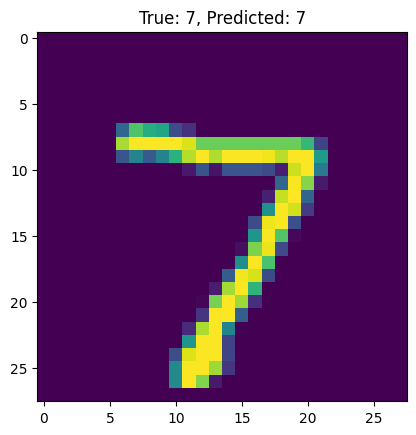

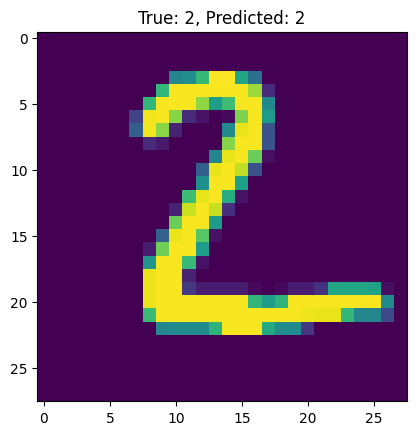

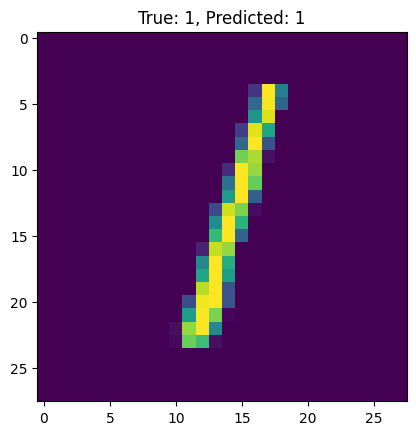

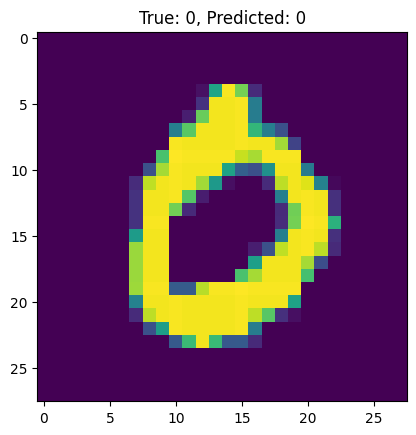

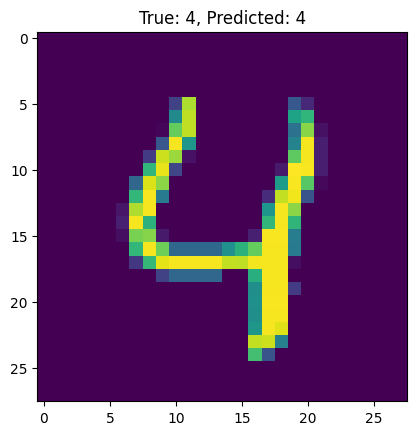

Incorrectly Classified Images:


In [ ]:
# Import library yang diperlukan untuk visualisasi
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menampilkan gambar dengan label
def imshow(img, title):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

# Mengambil satu batch data uji menggunakan iterator DataLoader
dataiter = iter(test_loader)
images, labels = next(dataiter)  # Menggunakan next() untuk mendapatkan batch berikutnya

# Melakukan prediksi pada batch uji
images, labels = images.to(device), labels.to(device)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Menampilkan gambar dengan prediksi
correct_pred_indices = (predicted == labels).nonzero().squeeze()
incorrect_pred_indices = (predicted != labels).nonzero().squeeze()

# Menampilkan gambar yang terklasifikasi dengan benar
print("Correctly Classified Images:")
for i in range(5):
    index = correct_pred_indices[i]
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")

# Menampilkan gambar yang terklasifikasi dengan salah
print("Incorrectly Classified Images:")
if incorrect_pred_indices.dim() == 0:  # Periksa apakah ini adalah skalar
    incorrect_pred_indices = incorrect_pred_indices.unsqueeze(0)  # Konversi menjadi tensor 1D

for i in range(min(3, len(incorrect_pred_indices))):
    index = incorrect_pred_indices[i].item()  # Gunakan item() untuk mendapatkan nilai skalar
    imshow(images[index].cpu(), f"True: {labels[index].item()}, Predicted: {predicted[index].item()}")